## OSMNX O-D pairs creation

Created 10 random O-D pairs. The origins_gdf and destinations_gdf in Data Folder is created in this notebook.

In [2]:
import geopandas as gpd
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim

/Users/kweon-youngseo/miniforge3/envs/studies/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/nh/bgd128891hxd7ggprg1zgbhm0000gn/T/ipykernel_36365/2243668136.py:1: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to 

## Create O-D

In [4]:
# generate G of LA County
G = ox.graph_from_place('Los Angeles County, CA, USA', network_type='drive')

/Users/kweon-youngseo/miniforge3/envs/studies/lib/python3.10/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/kweon-youngseo/miniforge3/envs/studies/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/kweon-youngseo/miniforge3/envs/studies/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/kweon-youngseo/miniforge3/envs/studies/lib/python3.10/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/Users/kweon-youngseo/miniforge3/envs/studies/lib/python3.10/site-packages/shapely/set_operations.py:340: RuntimeWarning: invalid value encountered in union
  return lib.union(a, b, **kwargs)
/Users/kweon-youngseo/miniforge3/envs/studi

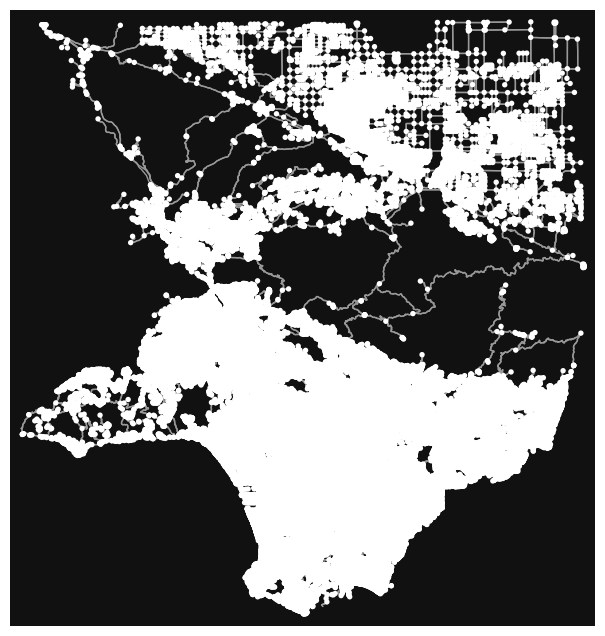

In [ ]:
fig, ax = ox.plot_graph(G)
plt.show()

In [ ]:
# convert to GeoDataFrames
nodes_gdf, edges_gdf = ox.graph_to_gdfs(G)

In [ ]:
edges_gdf

osmid   
u           v           key                                                    
653656      1718677597  0                                          159763316  \
            123189012   0    [1094670073, 1094670074, 1055876622, 383059215]   
            122697159   0     [1050285331, 1050285330, 399239123, 399239118]   
            1718756337  0                             [399258376, 399258374]   
653681      26427612    0                              [49287146, 149003055]   
...                                                                      ...   
10282698906 10282698902 0                                         1124470511   
10282698908 10282698899 0                                         1124470513   
10282727210 10282667848 0                                         1124470528   
10921172356 4103608485  0                                          408443245   
10994920986 325045085   0                                           29486469   

                                 lanes                       name   
u           v           key                                         
653656      1718677597  0            4       West Florence Avenue  \
            123189012   0    [4, 5, 6]  West Manchester Boulevard   
            122697159   0    [4, 5, 6]     West Manchester Avenue   
            1718756337  0       [5, 4]         Aviation Boulevard   
653681      26427612    0       [5, 6]          San Diego Freeway   
...                                ...                        ...   
10282698906 10282698902 0          NaN            Park Glen Court   
10282698908 10282698899 0          NaN            Park Glen Court   
10282727210 10282667848 0          NaN              Vintage Court   
10921172356 4103608485  0          NaN            Lady Linda Lane   
10994920986 325045085   0          NaN                        NaN   

                                 highway maxspeed  oneway reversed   length   
u           v           key                                                   
653656      1718677597  0      secondary   40 mph   False    False  253.852  \
            123189012   0        primary      NaN   False    False  159.909   
            122697159   0        primary      NaN   False     True  160.976   
            1718756337  0       tertiary      NaN   False    False  402.735   
653681      26427612    0       motorway   65 mph    True    False  252.266   
...                                  ...      ...     ...      ...      ...   
10282698906 10282698902 0    residential      NaN   False    False   79.545   
10282698908 10282698899 0    residential      NaN   False     True   65.442   
10282727210 10282667848 0    residential      NaN   False     True   40.961   
10921172356 4103608485  0    residential      NaN   False     True  190.290   
10994920986 325045085   0    residential      NaN   False     True   65.995   

                                                                      geometry   
u           v           key                                                      
653656      1718677597  0    LINESTRING (-118.37705 33.95990, -118.37705 33...  \
            123189012   0    LINESTRING (-118.37705 33.95990, -118.37695 33...   
            122697159   0    LINESTRING (-118.37705 33.95990, -118.37720 33...   
            1718756337  0    LINESTRING (-118.37705 33.95990, -118.37705 33...   
653681      26427612    0    LINESTRING (-118.40031 33.98940, -118.40087 33...   
...                                                                        ...   
10282698906 10282698902 0    LINESTRING (-118.64069 34.45947, -118.64075 34...   
10282698908 10282698899 0    LINESTRING (-118.63944 34.45851, -118.63982 34...   
10282727210 10282667848 0    LINESTRING (-118.63124 34.46071, -118.63157 34...   
10921172356 4103608485  0    LINESTRING (-118.54831 34.48244, -118.54838 34...   
10994920986 325045085   0    LINESTRING (-118.63838 34.47401, -118.63826 34...   

                               ref br

In [ ]:
# generate random points LA County
def sample_points(G, n, seed=None):
    if seed is not None:
        np.random.seed(seed)
    gdf_edges = ox.graph_to_gdfs(G, nodes=False)[['geometry', 'length']]
    weights = gdf_edges['length'] / gdf_edges['length'].sum()
    idx = np.random.choice(gdf_edges.index, size=n, p=weights)
    lines = gdf_edges.loc[idx, 'geometry']
    return lines.interpolate(lines.length * np.random.rand())

In [ ]:
# sample 10 points
origins = sample_points(G, 10, seed=11)
destinations = sample_points(G,10, seed=22)

/var/folders/nh/bgd128891hxd7ggprg1zgbhm0000gn/T/ipykernel_26009/2414583954.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(lines.length * np.random.rand())
/var/folders/nh/bgd128891hxd7ggprg1zgbhm0000gn/T/ipykernel_26009/2414583954.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'interpolate' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(lines.length * np.random.rand())
/var/folders/nh/bgd128891hxd7ggprg1zgbhm0000gn/T/ipykernel_26009/2414583954.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'length' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  return lines.interpolate(lines.length * np.random.rand())
/var/folders/nh/bgd1

In [ ]:
origins

u           v           key
298221680   1931344922  0      POINT (-118.29061 33.74893)
122623196   122819932   0      POINT (-118.30719 33.73248)
123763751   122693938   0      POINT (-118.50404 34.28963)
4726456954  122784052   0      POINT (-118.06502 34.54272)
123257162   123257159   0      POINT (-118.51592 34.27093)
370386634   370386179   0      POINT (-118.46643 34.18947)
122593405   123382229   0      POINT (-118.09311 33.90729)
408485712   1525398879  0      POINT (-118.36301 34.13323)
123041230   123509383   0      POINT (-118.73718 34.14820)
3749699449  122812666   0      POINT (-117.86927 34.13852)
dtype: geometry

In [ ]:
destinations

u            v           key
1774095082   1845269311  0      POINT (-118.25641 33.96803)
355623372    122752417   0      POINT (-118.27657 34.18182)
123259961    123526962   0      POINT (-118.29611 34.09343)
10820069648  123076302   0      POINT (-117.88500 34.14159)
123657337    123176647   0      POINT (-118.31419 33.80631)
122850436    122850438   0      POINT (-118.34724 34.01507)
122586184    123641220   0      POINT (-118.38714 34.09142)
123071143    123309236   0      POINT (-117.80895 34.48865)
2546485056   122622198   0      POINT (-118.19700 33.89943)
123399006    122858265   0      POINT (-117.75891 34.05762)
dtype: geometry

With Google maps, found the address of the O-D points.

In [ ]:
import googlemaps
from datetime import datetime

In [ ]:
# Jessica Google API Key
key = 'Jessica Google API Key'

In [ ]:
gmaps = googlemaps.Client(key=key)

In [ ]:
# origins_address

origins_addresses = []

for point in origins:
    lat, lon = point.y, point.x
    reverse_geocode_result = gmaps.reverse_geocode((lat, lon))
    if reverse_geocode_result:
        address = reverse_geocode_result[0]['formatted_address']
        origins_addresses.append(address)
    else:
        origins_addresses.append("no_address")

In [ ]:
origins_addresses

['654 W Elberon Ave, San Pedro, CA 90731, USA',
 '1366 W 13th St, San Pedro, CA 90732, USA',
 '17053 Mindora Ct, Granada Hills, CA 91344, USA',
 '3636 Ponderosa Way, Palmdale, CA 93550, USA',
 '17508 Ludlow St, Granada Hills, CA 91344, USA',
 '6525 N Sepulveda Blvd, Van Nuys, CA 91406, USA',
 '13627 Longworth Ave, Norwalk, CA 90650, USA',
 '3743 Fredonia Dr, Los Angeles, CA 90068, USA',
 '5402 Chesebro Rd, Agoura Hills, CA 91301, USA',
 '332 W Meda Ave, Glendora, CA 91741, USA']

In [ ]:
# destinations_address

destinations_addresses = []

for point in destinations:
    lat, lon = point.y, point.x
    reverse_geocode_result = gmaps.reverse_geocode((lat, lon))
    if reverse_geocode_result:
        address = reverse_geocode_result[0]['formatted_address']
        destinations_addresses.append(address)
    else:
        destinations_addresses.append("no_address")

In [ ]:
destinations_addresses

['7817 S Central Ave, Los Angeles, CA 90001, USA',
 '1818 W Mountain St, Glendale, CA 91201, USA',
 'Edgemont & Lexington Ave., Los Angeles, CA 90029, USA',
 '412 Conway Ct, Glendora, CA 91741, USA',
 '1973 241st St, Lomita, CA 90717, USA',
 '4506 Santa Rosalia Dr, Los Angeles, CA 90008, USA',
 '8967 Shoreham Dr, Los Angeles, CA 90069, USA',
 'Llano Cutoff, Llano, CA 93544, USA',
 '14703 S Castlegate Ave, Compton, CA 90221, USA',
 '891 W 2nd St, Pomona, CA 91766, USA']

In [ ]:
# convert origins to GeoDataFrame and add 'address' column
origins_gdf = gpd.GeoDataFrame(origins, columns=['geometry'])
origins_gdf['address'] = origins_addresses

In [ ]:
origins_gdf

,,,geometry,address
u,v,key,,
298221680,1931344922,0,POINT (-118.29061 33.74893),"654 W Elberon Ave, San Pedro, CA 90731, USA"
122623196,122819932,0,POINT (-118.30719 33.73248),"1366 W 13th St, San Pedro, CA 90732, USA"
123763751,122693938,0,POINT (-118.50404 34.28963),"17053 Mindora Ct, Granada Hills, CA 91344, USA"
4726456954,122784052,0,POINT (-118.06502 34.54272),"3636 Ponderosa Way, Palmdale, CA 93550, USA"
123257162,123257159,0,POINT (-118.51592 34.27093),"17508 Ludlow St, Granada Hills, CA 91344, USA"
370386634,370386179,0,POINT (-118.46643 34.18947),"6525 N Sepulveda Blvd, Van Nuys, CA 91406, USA"
122593405,123382229,0,POINT (-118.09311 33.90729),"13627 Longworth Ave, Norwalk, CA 90650, USA"
408485712,1525398879,0,POINT (-118.36301 34.13323),"3743 Fredonia Dr, Los Angeles, CA 90068, USA"
123041230,123509383,0,POINT (-118.73718 34.14820),"5402 Chesebro Rd, Agoura Hills, CA 91301, USA"


In [ ]:
# convert destinations to GeoDataFrame and add 'address' column
destinations_gdf = gpd.GeoDataFrame(destinations, columns=['geometry'])
destinations_gdf['address'] = destinations_addresses

In [ ]:
destinations_gdf

,,,geometry,address
u,v,key,,
1774095082,1845269311,0,POINT (-118.25641 33.96803),"7817 S Central Ave, Los Angeles, CA 90001, USA"
355623372,122752417,0,POINT (-118.27657 34.18182),"1818 W Mountain St, Glendale, CA 91201, USA"
123259961,123526962,0,POINT (-118.29611 34.09343),"Edgemont & Lexington Ave., Los Angeles, CA 900..."
10820069648,123076302,0,POINT (-117.88500 34.14159),"412 Conway Ct, Glendora, CA 91741, USA"
123657337,123176647,0,POINT (-118.31419 33.80631),"1973 241st St, Lomita, CA 90717, USA"
122850436,122850438,0,POINT (-118.34724 34.01507),"4506 Santa Rosalia Dr, Los Angeles, CA 90008, USA"
122586184,123641220,0,POINT (-118.38714 34.09142),"8967 Shoreham Dr, Los Angeles, CA 90069, USA"
123071143,123309236,0,POINT (-117.80895 34.48865),"Llano Cutoff, Llano, CA 93544, USA"
2546485056,122622198,0,POINT (-118.19700 33.89943),"14703 S Castlegate Ave, Compton, CA 90221, USA"


In [ ]:
origins_gdf['geometry'] = origins_gdf['geometry'].apply(lambda x: x.wkt)
destinations_gdf['geometry'] = destinations_gdf['geometry'].apply(lambda x: x.wkt)

/Users/kweon-youngseo/miniforge3/envs/ppd599/lib/python3.10/site-packages/geopandas/geodataframe.py:1442: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")
/Users/kweon-youngseo/miniforge3/envs/ppd599/lib/python3.10/site-packages/geopandas/geodataframe.py:1442: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [ ]:
# export